In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from aegomoku.gomoku_game import ConstantBoardInitializer, GomokuGame
from aegomoku.arena import Arena
from aegomoku.interfaces import MctsParams, PolicyParams
from aegomoku.gomoku_players import PolicyAdvisedGraphSearchPlayer
from pathlib import Path

In [3]:
from aegomoku.gomoku_game import RandomBoardInitializer, TopoSwap2BoardInitializer
from aegomoku.policies.topological_value import TopologicalValuePolicy

BOARD_SIZE = 19
# initializer = RandomBoardInitializer(BOARD_SIZE, 4, 8, 10, 8, 10)
initializer = TopoSwap2BoardInitializer(BOARD_SIZE)
the_game = GomokuGame(board_size=BOARD_SIZE, initializer=initializer)

model_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'models' / '2_c1.model'
mcts_champion = MctsParams(cpuct=4.0, temperature=0, num_simulations=200)
policy_champion = PolicyParams(model_file_name=model_file, advice_cutoff=.01)
player1 = PolicyAdvisedGraphSearchPlayer("Champion 2_c1", the_game, mcts_champion, policy_champion)

model_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'models' / '3_c2.model'
mcts_challenger = MctsParams(cpuct=4.0, temperature=0, num_simulations=200)
policy_challenger = PolicyParams(model_file_name=model_file, advice_cutoff=.01)
player2 = PolicyAdvisedGraphSearchPlayer("Candidate 3_c2", the_game, mcts_challenger, policy_challenger)




#mcts_champion = MctsParams(cpuct=4.0, temperature=0, num_simulations=400)
#policy_champion = PolicyParams(model_file_name=None, advice_cutoff=.01)
#advisor = TopologicalValuePolicy(board_size=BOARD_SIZE)
#player2 = PolicyAdvisedGraphSearchPlayer("Heuristics", the_game, mcts_champion, policy_params=None, adviser=advisor)

arena = Arena(game=the_game, player1=player1, player2=player2, max_moves=100)

In [24]:
arena.play_game(verbose=2)

KeyboardInterrupt: 

# TODO: Arena needs to respect the gamestate

In [19]:
arena_file = Path.home() / "workspace" / "Project-Ellie" / "DATA" / 'arena' / '3_c3.arena'

In [20]:
stats = arena.play_games(100, verbose=1, save_to=arena_file)

Game 1: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[C13, G15, H18, M11, J9, M12, E15, M9, F16, M10, D14, M13]
Game 2: Champion 2_c1 to begin with black.
Champion 2_c1 (black) won.
[C14, F18, A19, J14, G10, J13, E12, J12, F11, D13, J11, J15, J16, I14, H9, I8, G11, K14, H11, I11, D11, E11, G14, L14, M14, H14]
Game 3: Champion 2_c1 to begin with black.


KeyboardInterrupt: 

In [7]:
stats

{Candidate 3_c1: 22, Champion 2_c1: 18, 'draws': 0}

In [15]:
from pickle import Pickler

with open('1_c3.arena', 'wb+') as f:
    Pickler(f).dump(arena.games)

In [6]:
n = 0

In [22]:
arena.games[1]

[97,
 24,
 0,
 104,
 177,
 123,
 137,
 142,
 157,
 117,
 161,
 85,
 66,
 103,
 197,
 217,
 158,
 105,
 159,
 160,
 155,
 156,
 101,
 106,
 107,
 102]

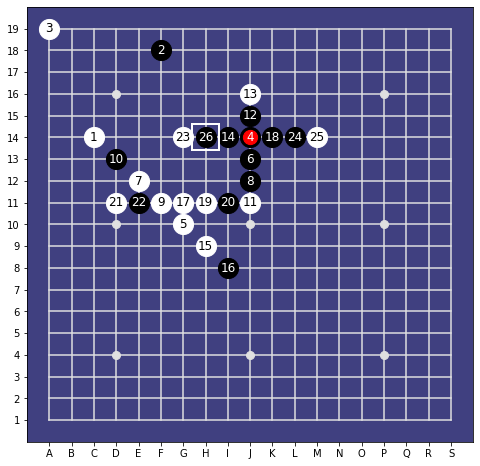

In [23]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = arena.board.stones
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, arena.games[1], heuristics, disp_width=8)
n += 1

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


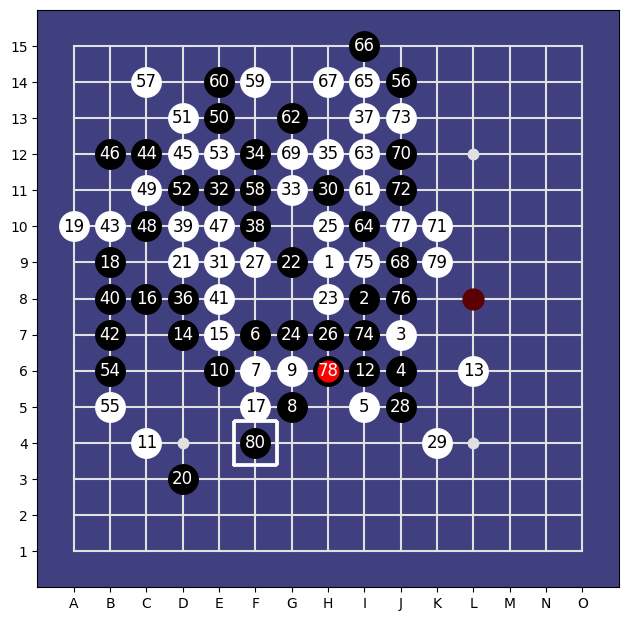

In [9]:
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.utils import analyse_board
moves = arena.games[0]
heuristics = HeuristicPolicy(BOARD_SIZE, cut_off=0.1)
analyse_board(BOARD_SIZE, moves, heuristics, disp_width=7.5)

In [10]:
arena.max_moves

40